In [450]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [451]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
import talib as tb
from scipy import stats
import copy

In [452]:
%matplotlib inline
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [453]:
path = 'C:/Users/LZJF_02/Desktop/BacktestRA/'

In [454]:
filenameKKTest = 'KkRatioStrategy20170601-20171201.csv'
filenameKKTrain = 'KkRatioStrategy20160601-20170601.csv'

In [455]:
# multi
filenameMultiCycleTest = 'MultiCycleStrategy20170601-20171201.csv'
filenameMultiCycleTrain =  'MultiCycleStrategy20150601-20170601.csv' 

In [456]:
def calPosPeriod(df,barBin = 5):
    df.entryDt = df.entryDt.apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    df.exitDt = df.exitDt.apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    df['posPeriod'] = (df.exitDt - df.entryDt)
    df['posPeriod'] = df['posPeriod'].apply(lambda x: x.total_seconds() / 60 /barBin)
    return df

In [457]:
def varDiff(df1,df2,iterNum = 10000):
    """ To test the whether there is a significance difference bewteen two population variance with unequal Sample size.
    Parameters:
    df1:DataFrame. The outcome of calPosPeriod function.
    df2:DataFrame. The outcome of calPosPeriod function.
    iterNum: Int. The iteration number.
    Return:Series. The Series of pValueList.
    """
    shape1 = df1.shape[0]
    shape2 = df2.shape[0]
    pValueList = []
    if shape1 > shape2:
        for i in xrange(iterNum):
            pValueList.append(stats.ttest_rel(np.random.choice(df1.pnl.values,shape2),
                                              df2.pnl.values).pvalue)
    else:
        for i in xrange(iterNum):
            pValueList.append(stats.ttest_rel(np.random.choice(df2.pnl.values,shape1),
                                              df1.pnl.values).pvalue)
    return pd.Series(pValueList)

In [458]:
kkTest = pd.read_csv(path+filenameKKTest,infer_datetime_format=True,parse_dates=[0])
kkTrain = pd.read_csv(path+filenameKKTrain,infer_datetime_format=True,parse_dates=[0])
kkTest = calPosPeriod(kkTest)
kkTrain = calPosPeriod(kkTrain)

In [459]:
MultiCycleTest = pd.read_csv(path+filenameMultiCycleTest,infer_datetime_format=True,parse_dates=[0])
MultiCycleTrain = pd.read_csv(path+filenameMultiCycleTrain,infer_datetime_format=True,parse_dates=[0])
MultiCycleTest = calPosPeriod(MultiCycleTest)
MultiCycleTrain = calPosPeriod(MultiCycleTrain)

In [460]:
P_MultiCycle = varDiff(MultiCycleTest,MultiCycleTrain)

In [461]:
print 'The 5% quantile is'+" "+ str(P_MultiCycle.quantile(0.05)),'\t'
print 'The number of P-Values below 0.05 is' +" "+ str(P_MultiCycle[P_MultiCycle <= 0.05].shape[0] / P_MultiCycle.shape[0])
P_MultiCycle.describe()

The 5% quantile is 0.234977212477 	
The number of P-Values below 0.05 is 0.0012


count    10000.000000
mean         0.654838
std          0.229920
min          0.008745
25%          0.488289
50%          0.685248
75%          0.848657
max          0.999959
dtype: float64

In [462]:
MultiCycleTest[MultiCycleTest.volume==-1].describe()

,exitPrice,volume,turnover,commission,slippage,pnl,posPeriod
count,30.000000,30.0,30.000000,30.000000,30.0,30.000000,30.000000
mean,3693.833333,-1.0,73829.333333,22.148800,20.0,-89.482133,67.393333
std,238.669022,0.0,4726.193287,1.417858,0.0,278.695858,57.781431
min,2962.000000,-1.0,59470.000000,17.841000,20.0,-433.409000,2.400000
25%,3606.250000,-1.0,71920.000000,21.576000,20.0,-341.516250,15.850000
50%,3718.000000,-1.0,74230.000000,22.269000,20.0,-106.793500,65.500000
75%,3858.500000,-1.0,76935.000000,23.080500,20.0,100.752250,105.900000
max,4084.000000,-1.0,81410.000000,24.423000,20.0,538.022000,234.400000


In [463]:
MultiCycleTest[MultiCycleTest.volume==1].describe()

,exitPrice,volume,turnover,commission,slippage,pnl,posPeriod
count,36.000000,36.0,36.000000,36.000000,36.0,36.000000,36.000000
mean,3717.777778,1.0,74133.333333,22.240000,20.0,179.982222,176.933333
std,232.130273,0.0,4555.145913,1.366544,0.0,579.812098,231.717449
min,3150.000000,1.0,63070.000000,18.921000,20.0,-474.411000,4.600000
25%,3621.250000,1.0,72455.000000,21.736500,20.0,-178.389500,44.750000
50%,3742.500000,1.0,74595.000000,22.378500,20.0,47.014000,88.100000
75%,3869.500000,1.0,77355.000000,23.206500,20.0,520.518250,239.600000
max,4056.000000,1.0,81370.000000,24.411000,20.0,2386.393000,860.000000


In [464]:
MultiCycleTrain[MultiCycleTrain.volume==-1].describe()

,exitPrice,volume,turnover,commission,slippage,pnl,posPeriod
count,113.000000,113.0,113.000000,113.000000,113.0,113.000000,113.000000
mean,2418.946903,-1.0,48465.663717,14.539699,20.0,52.185965,320.219469
std,529.776601,0.0,10612.706070,3.183812,0.0,384.626559,560.614053
min,1636.000000,-1.0,33090.000000,9.927000,20.0,-358.690000,1.000000
25%,1967.000000,-1.0,39210.000000,11.763000,20.0,-180.995000,11.400000
50%,2324.000000,-1.0,46570.000000,13.971000,20.0,-68.753000,104.000000
75%,2939.000000,-1.0,58630.000000,17.589000,20.0,177.547000,331.400000
max,3583.000000,-1.0,71370.000000,21.411000,20.0,2600.296000,2876.600000


In [465]:
MultiCycleTest.pnl.std()**2 / MultiCycleTrain.pnl.std()**2

1.6233477447214497

In [466]:
# The Levene test tests the null hypothesis that all input samples are from populations with equal variances. 
# Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.
# P值比0.05大接受null hypothsis,即方差稳定
stats.levene(MultiCycleTest.pnl.values, MultiCycleTrain.pnl.values)

LeveneResult(statistic=1.6006632447902718, pvalue=0.20678134160909584)

In [467]:
stats.levene(MultiCycleTest[MultiCycleTest.volume ==-1].pnl.values, MultiCycleTrain[MultiCycleTrain.volume==-1].pnl.values)

LeveneResult(statistic=0.15006737253731781, pvalue=0.6990551035340955)

In [468]:
# F检定判断两者样本方差是否一样（Note that the F-test is extremely sensitive to non-normality of X and Y, so you're probably better off doing a more robust 
#test such as Levene's test or Bartlett's test unless you're reasonably sure that X and Y are distributed normally.）
stats.f.cdf(MultiCycleTest.pnl.std()**2 / MultiCycleTrain.pnl.std()**2, MultiCycleTest.shape[0]-1,MultiCycleTrain.shape[0]-1)

0.99518945616117949

In [469]:
# 多头利润统计分析
MultiCycleTestLong = MultiCycleTest[MultiCycleTest.volume ==1]
MultiCycleTestLong.describe()

,exitPrice,volume,turnover,commission,slippage,pnl,posPeriod
count,36.000000,36.0,36.000000,36.000000,36.0,36.000000,36.000000
mean,3717.777778,1.0,74133.333333,22.240000,20.0,179.982222,176.933333
std,232.130273,0.0,4555.145913,1.366544,0.0,579.812098,231.717449
min,3150.000000,1.0,63070.000000,18.921000,20.0,-474.411000,4.600000
25%,3621.250000,1.0,72455.000000,21.736500,20.0,-178.389500,44.750000
50%,3742.500000,1.0,74595.000000,22.378500,20.0,47.014000,88.100000
75%,3869.500000,1.0,77355.000000,23.206500,20.0,520.518250,239.600000
max,4056.000000,1.0,81370.000000,24.411000,20.0,2386.393000,860.000000


In [470]:
MultiCycleTestLong[MultiCycleTestLong.pnl > 0].describe()

,exitPrice,volume,turnover,commission,slippage,pnl,posPeriod
count,20.000000,20.0,20.000000,20.000000,20.0,20.000000,20.000000
mean,3770.150000,1.0,74848.000000,22.454400,20.0,512.545600,245.600000
std,196.088668,0.0,3873.626887,1.162088,0.0,583.714444,253.773243
min,3262.000000,1.0,64010.000000,19.203000,20.0,6.315000,4.600000
25%,3665.000000,1.0,72762.500000,21.828750,20.0,108.019000,84.600000
50%,3757.500000,1.0,74595.000000,22.378500,20.0,358.268000,102.400000
75%,3951.750000,1.0,78755.000000,23.626500,20.0,657.617000,284.950000
max,4056.000000,1.0,79720.000000,23.916000,20.0,2386.393000,860.000000


In [471]:
MultiCycleTestLong[MultiCycleTestLong.pnl < 0].describe()

,exitPrice,volume,turnover,commission,slippage,pnl,posPeriod
count,16.000000,16.0,16.000000,16.000000,16.0,16.00000,16.000000
mean,3652.312500,1.0,73240.000000,21.972000,20.0,-235.72200,91.100000
std,262.292894,0.0,5279.829543,1.583949,0.0,145.07835,171.941432
min,3150.000000,1.0,63070.000000,18.921000,20.0,-474.41100,4.600000
25%,3520.250000,1.0,70695.000000,21.208500,20.0,-372.03350,17.750000
50%,3689.500000,1.0,74065.000000,22.219500,20.0,-207.83150,48.300000
75%,3806.000000,1.0,76427.500000,22.928250,20.0,-139.66350,78.600000
max,4047.000000,1.0,81370.000000,24.411000,20.0,-30.15100,719.400000


In [472]:
# 空头利润统计分析
MultiCycleTestShort= MultiCycleTest[MultiCycleTest.volume ==-1]
MultiCycleTestShort.describe()

,exitPrice,volume,turnover,commission,slippage,pnl,posPeriod
count,30.000000,30.0,30.000000,30.000000,30.0,30.000000,30.000000
mean,3693.833333,-1.0,73829.333333,22.148800,20.0,-89.482133,67.393333
std,238.669022,0.0,4726.193287,1.417858,0.0,278.695858,57.781431
min,2962.000000,-1.0,59470.000000,17.841000,20.0,-433.409000,2.400000
25%,3606.250000,-1.0,71920.000000,21.576000,20.0,-341.516250,15.850000
50%,3718.000000,-1.0,74230.000000,22.269000,20.0,-106.793500,65.500000
75%,3858.500000,-1.0,76935.000000,23.080500,20.0,100.752250,105.900000
max,4084.000000,-1.0,81410.000000,24.423000,20.0,538.022000,234.400000


In [473]:
MultiCycleTestShort[MultiCycleTestShort.pnl>0].describe()

,exitPrice,volume,turnover,commission,slippage,pnl,posPeriod
count,9.000000,9.0,9.000000,9.000000,9.0,9.000000,9.000000
mean,3627.888889,-1.0,72856.666667,21.857000,20.0,257.031889,119.933333
std,281.985569,0.0,5661.384548,1.698415,0.0,184.269655,49.216054
min,2962.000000,-1.0,59470.000000,17.841000,20.0,17.494000,53.000000
25%,3574.000000,-1.0,71650.000000,21.495000,20.0,137.440000,96.600000
50%,3634.000000,-1.0,73260.000000,21.978000,20.0,192.159000,112.200000
75%,3751.000000,-1.0,75200.000000,22.560000,20.0,406.393000,127.600000
max,3912.000000,-1.0,78690.000000,23.607000,20.0,538.022000,234.400000


In [474]:
MultiCycleTestShort[MultiCycleTestShort.pnl<0].describe()

,exitPrice,volume,turnover,commission,slippage,pnl,posPeriod
count,21.000000,21.0,21.000000,21.000000,21.0,21.000000,21.000000
mean,3722.095238,-1.0,74246.190476,22.273857,20.0,-237.988143,44.876190
std,219.075992,0.0,4354.285792,1.306286,0.0,147.825094,45.800021
min,3035.000000,-1.0,60390.000000,18.117000,20.0,-433.409000,2.400000
25%,3610.000000,-1.0,72010.000000,21.603000,20.0,-363.076000,8.000000
50%,3720.000000,-1.0,74250.000000,22.275000,20.0,-302.344000,18.800000
75%,3862.000000,-1.0,76940.000000,23.082000,20.0,-101.948000,79.000000
max,4084.000000,-1.0,81410.000000,24.423000,20.0,-1.270000,155.600000


In [475]:
pValueList = []
for i in xrange(10000):
    pValueList.append(stats.ttest_rel(np.random.choice(kkTrain.pnl.values,min(kkTest.shape[0],kkTrain.shape[0])), kkTest.pnl.values).pvalue)   
pValueSeries = pd.Series(pValueList)
pValueSeries.describe()

count    10000.000000
mean         0.564641
std          0.263294
min          0.004085
25%          0.349231
50%          0.574660
75%          0.792351
max          0.999928
dtype: float64

In [476]:
PValue = varDiff(kkTrain,kkTest)

In [477]:
PValue.describe()

count    10000.000000
mean         0.565575
std          0.261136
min          0.006550
25%          0.353399
50%          0.573155
75%          0.790191
max          0.999996
dtype: float64

In [478]:
pValueSeries[pValueSeries <= 0.05].shape[0] / pValueSeries.shape[0]

0.0075

In [479]:
pValueSeries.quantile(0.05)

0.12977711150341512

In [480]:
# 根据pValue的均值和中位数以及5%的分位数可以看出 P-Value是大概率远大于0.05的，所以接受原假设，及两组PNL方差相同，收益稳定。

In [481]:
np.sqrt(2)

1.4142135623730951

In [482]:
# int
buffSize = 20
buffCount = 0
LLPeriod = 20
LSPeriod = 10
peakRatio = 0.991

# Array

closeArray = np.zeros(buffSize)
HPArray = np.zeros(buffSize)
FiltArray = np.zeros(buffSize)
IPeakArray = np.zeros(buffSize)
RealArray = np.zeros(buffSize)
QuadArray = np.zeros(buffSize)
QPeakArray = np.ones(buffSize)
ImagArray = np.ones(buffSize)

alpha1 = (np.cos(0.707*360*np.pi/(180 * 48)) + np.sin(0.707*360 * np.pi / (180*48)) - 1) / np.cos(0.707*360 * np.pi/ (180 * 48))

a1Long = np.exp(-1.414 * np.pi / LLPeriod)
b1Long= 2 * a1Long *np.cos(1.414 * 180 * np.pi / (180 * LLPeriod) )
c2Long = b1Long
c3Long = - a1Long ** 2 
c1Long = 1 - c2Long - c3Long

a1Short = np.exp(1.414 * np.pi / LSPeriod)
b1Short = 2 * a1Short *np.cos(1.414 * 180 * np.pi / (180 * LSPeriod) )
c2Short = b1Short
c3Short = - a1Short ** 2
c1Short = 1 - c2Short - c3Short

# hibert trasnform
closeNew = MultiCycleTrain. exitPrice.values
for close in closeNew:
    # 推送最新收盘价
    closeArray[0:buffSize -1] = closeArray[1:buffSize ]
    closeArray[-1] = close
    
    # 更新HPArray
    HP = ((1 - alpha1 / 2) ** 2) * (closeArray[-1] - 2 * closeArray[-2] + closeArray[-3]) + \
        2 * (1 - alpha1) * HPArray[-1] - (1 - alpha1) ** 2 * HPArray[-2]
    HPArray[0:buffSize -1] = HPArray[1:buffSize ]
    HPArray[-1] = HP
    
    # 更新FiltArray
    Filt = c1Long * (HPArray[-1] + HPArray[-2]) / 2  + c2Long * FiltArray[-1] + c3Long * FiltArray[-2]
    FiltArray[0:buffSize -1] = FiltArray[1:buffSize ]
    FiltArray[-1] = Filt
    
    # 更新IPeak
    IPeak = peakRatio * IPeakArray[-1]
    if np.abs(Filt) > IPeak or IPeak == 0:
        IPeak = np.abs(Filt)
    IPeakArray[0:buffSize -1] = IPeakArray[1:buffSize ]
    IPeakArray[-1] = IPeak
    
    # 更新Real
    Real = Filt / IPeak
    RealArray[0:buffSize -1] = RealArray[1:buffSize ]
    RealArray[-1] = Real
    
    # 更新Quad
    Quad = (RealArray[-1] - RealArray[-2])
    QuadArray[0:buffSize -1] = QuadArray[1:buffSize]
    QuadArray[-1] = Quad
    
    # 更新QPeak
    QPeak = peakRatio * QPeakArray[-1]
    if np.abs(Quad) > QPeak:
        QPeak = np.abs(Quad)
    QPeakArray[0:buffSize -1] = QPeakArray[1:buffSize]
    QPeakArray[-1] = Quad
    
    # 更新Imag
    Imag = c1Short * (QuadArray[-1] + QuadArray[-2]) / 2  + c2Short * ImagArray[-1] + c3Short * ImagArray[-2]
    ImagArray[0:buffSize -1] = ImagArray[1:buffSize]
    ImagArray[-1] = Quad
    
    
    
    buffCount +=1
    #print buffCount
    if buffCount < buffSize:
        continue
    print ImagArray
    #print HPArray

[ 1.          0.          0.          0.          0.          0.          0.
 -0.02993252 -0.08157149 -0.12021258 -0.13672364 -0.14062879 -0.13876091
 -0.12927852 -0.11672343 -0.10314818 -0.08961363 -0.07650302 -0.06655935
 -0.0580495 ]
[ 0.          0.          0.          0.          0.          0.
 -0.02993252 -0.08157149 -0.12021258 -0.13672364 -0.14062879 -0.13876091
 -0.12927852 -0.11672343 -0.10314818 -0.08961363 -0.07650302 -0.06655935
 -0.0580495  -0.04843826]
[ 0.          0.          0.          0.          0.         -0.02993252
 -0.08157149 -0.12021258 -0.13672364 -0.14062879 -0.13876091 -0.12927852
 -0.11672343 -0.10314818 -0.08961363 -0.07650302 -0.06655935 -0.0580495
 -0.04843826 -0.03993942]
[ 0.          0.          0.          0.         -0.02993252 -0.08157149
 -0.12021258 -0.13672364 -0.14062879 -0.13876091 -0.12927852 -0.11672343
 -0.10314818 -0.08961363 -0.07650302 -0.06655935 -0.0580495  -0.04843826
 -0.03993942 -0.03059177]
[ 0.          0.          0.         

In [483]:
ImagArray

array([ 0.03127025,  0.01996439,  0.01855631,  0.01160312,  0.00079649,
        0.01457701,  0.0504839 ,  0.09696611,  0.15161113,  0.19468778,
        0.19047058,  0.14932779,  0.12156976,  0.09010734,  0.04658596,
        0.03184708,  0.03997527,  0.07972686,  0.11418709,  0.06954821])

In [484]:
ImagArray

array([ 0.03127025,  0.01996439,  0.01855631,  0.01160312,  0.00079649,
        0.01457701,  0.0504839 ,  0.09696611,  0.15161113,  0.19468778,
        0.19047058,  0.14932779,  0.12156976,  0.09010734,  0.04658596,
        0.03184708,  0.03997527,  0.07972686,  0.11418709,  0.06954821])

In [485]:
np.roll(ImagArray,2)

array([ 0.11418709,  0.06954821,  0.03127025,  0.01996439,  0.01855631,
        0.01160312,  0.00079649,  0.01457701,  0.0504839 ,  0.09696611,
        0.15161113,  0.19468778,  0.19047058,  0.14932779,  0.12156976,
        0.09010734,  0.04658596,  0.03184708,  0.03997527,  0.07972686])

In [486]:
d = np.array(range(10))
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [487]:
c[1:4] = [4,10,3]
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [488]:
def burgerMethod(ts,iterNum = 10):
    f_ = ts
    b_ = ts
    for i in range(0,iterNum):
        f = f_[1:]
        b = b_[:-1]
        k = - 2 * np.dot(b,f) / (np.dot(f,f) + np.dot(b,b))
        if i == iterNum -1:
            break
        f_ = f + k * b
        b_ = b + k * f
    return f_,b_

In [489]:
burgerMethod(ImagArray,5)

(array([-0.00220044,  0.02087884,  0.01671933,  0.02215942,  0.03189666,
         0.01799507, -0.01159972, -0.0082551 ,  0.01346447, -0.02144615,
        -0.01744721,  0.01724373,  0.00262263,  0.03074498,  0.00474424,
        -0.05082161]),
 array([ 0.01359847,  0.00396889, -0.00683549,  0.00968881,  0.00333452,
        -0.01280704, -0.01239845, -0.00576221, -0.01587782, -0.0158824 ,
         0.03325832,  0.02641761,  0.00151392,  0.03157349,  0.00519218,
         0.00692087]))

In [490]:

x = copy.deepcopy(np.array(range(12)))
ts = copy.copy(ImagArray)
ts

array([ 0.03127025,  0.01996439,  0.01855631,  0.01160312,  0.00079649,
        0.01457701,  0.0504839 ,  0.09696611,  0.15161113,  0.19468778,
        0.19047058,  0.14932779,  0.12156976,  0.09010734,  0.04658596,
        0.03184708,  0.03997527,  0.07972686,  0.11418709,  0.06954821])

In [491]:
ImagArray

array([ 0.03127025,  0.01996439,  0.01855631,  0.01160312,  0.00079649,
        0.01457701,  0.0504839 ,  0.09696611,  0.15161113,  0.19468778,
        0.19047058,  0.14932779,  0.12156976,  0.09010734,  0.04658596,
        0.03184708,  0.03997527,  0.07972686,  0.11418709,  0.06954821])

In [492]:
cc = np.array(range(10))
cc[1:3] = [5,6]
cc

array([0, 5, 6, 3, 4, 5, 6, 7, 8, 9])

In [493]:
ts

array([ 0.03127025,  0.01996439,  0.01855631,  0.01160312,  0.00079649,
        0.01457701,  0.0504839 ,  0.09696611,  0.15161113,  0.19468778,
        0.19047058,  0.14932779,  0.12156976,  0.09010734,  0.04658596,
        0.03184708,  0.03997527,  0.07972686,  0.11418709,  0.06954821])

In [531]:
def burgMese(ts,iterNum =5):
    f = copy.copy(ts)
    b = copy.copy(ts)
    N = len(ts) - 1
    Ak = np.zeros(iterNum+1)
    Ak[0] = 1
    Dk = 2 * (f * b).sum() - f[0] ** 2 - b[N] ** 2  
    for k in range(iterNum):
        # 更新mu

        mu = -2*(f[k+1:N] * b[:N-k-1]).sum()/ Dk
        
        # 更新Ak
        t1 = Ak[:int((k+1)/2) +1] + mu * Ak[k+1:k-int((k+1)/2):-1]
        t2 = Ak[k+1:k-int((k+1)/2):-1] + mu * Ak[:int((k+1)/2)+1]
        Ak[:int((k+1)/2) +1] = t1
        Ak[k+1:k-int((k+1)/2):-1] = t2
        
        # 更新f和b
        t3 = f[k+1:N+1] + mu * b[0:N-k]
        t4 = mu * f[k+1:N+1] + b[0:N-k]
        f[k+1:N+1] = t3
        b[0:N-k] = t4

        # 更新Dk
        Dk = (1 - mu**2) * Dk - f[k+1]**2 - b[N-k-1]**2
    return Ak

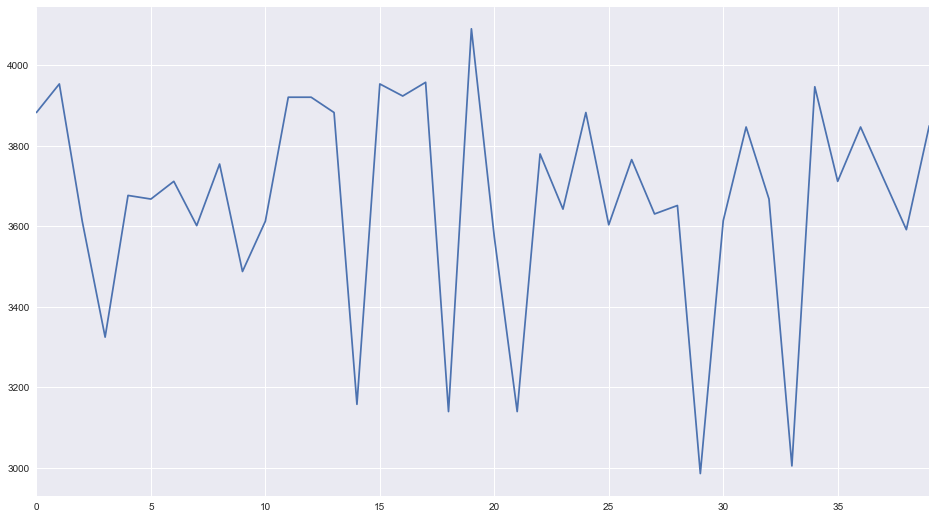

In [1004]:
#pd.Series(np.random.choice(MultiCycleTest.entryPrice.values.astype(float),40)).plot(figsize=(16,9))
a = burgMese(np.random.choice(MultiCycleTrain.entryPrice.values.astype(float),40))[1:]
a = burgMese(np.random.rand(35),20)[1:]
sigma = 1
TSpace = 28
I_num = sigma * sigma
Spectrum = np.zeros(TSpace)*np.nan
mArray = np.array(range(1,a.shape[0]+1))

for Period in range(3,TSpace):
    CT = (a * np.cos(2 * np.pi * mArray/Period)).sum()
    
    ST =  (a * np.sin(2 * np.pi * mArray/Period)).sum()
    Spectrum[Period] = 1 / ((1-CT)**2+(ST)**2)
T = np.nanargmax(Spectrum)
print 'Cycle estimated by MESE is %d '%T

Cycle estimated by MESE is 7 


In [980]:
np.random.rand(35)

array([ 0.86896593,  0.36916211,  0.99219187,  0.46547674,  0.81641876,
        0.42522855,  0.22925082,  0.12673571,  0.05367807,  0.65327306,
        0.7259836 ,  0.47064632,  0.08565421,  0.31476771,  0.57107046,
        0.75576158,  0.71520719,  0.22260903,  0.45101007,  0.12864235,
        0.405194  ,  0.60640982,  0.37567761,  0.68258201,  0.68791239,
        0.34180039,  0.59902553,  0.16551454,  0.99788947,  0.31544866,
        0.33009907,  0.19403313,  0.43580688,  0.91427382,  0.93805355])

In [898]:
a * (mArray +1)

array([-0.53072822,  0.00666457, -1.08683627,  0.10427743, -0.56373972])

In [574]:
np.random.uniform(2,10,40)

array([ 4.38678145,  7.05088104,  3.5383178 ,  3.79796502,  7.15787107,
        8.08447685,  2.91578487,  9.62478258,  4.80109458,  5.85650798,
        4.19800463,  6.58659025,  9.12499697,  7.73958409,  6.02192548,
        5.65375088,  5.3526797 ,  4.0765383 ,  4.55727176,  9.04701816,
        9.86789857,  3.64835727,  8.56304893,  2.20093477,  5.1357075 ,
        8.99085642,  5.71853863,  2.62605072,  2.44003144,  6.65826907,
        2.57557413,  4.06310744,  8.54582106,  2.86692932,  2.88712743,
        3.46833142,  8.00286438,  7.1011438 ,  9.76845501,  9.53319025])

In [577]:
np.abs(np.random.normal(40))

39.593528231245855

In [506]:
MultiCycleTest.entryPrice.values.astype(float)

array([ 3004.,  2985.,  3157.,  3139.,  3310.,  3324.,  3358.,  3487.,
        3613.,  3630.,  3577.,  3576.,  3547.,  3612.,  3767.,  3813.,
        3893.,  3953.,  3944.,  3830.,  3711.,  3779.,  3840.,  3945.,
        3769.,  3794.,  3846.,  3920.,  3849.,  3920.,  4057.,  4090.,
        3994.,  3957.,  3882.,  3946.,  3923.,  3843.,  3754.,  3692.,
        3591.,  3642.,  3671.,  3603.,  3676.,  3573.,  3543.,  3603.,
        3651.,  3765.,  3829.,  3574.,  3718.,  3792.,  3701.,  3601.,
        3601.,  3667.,  3605.,  3700.,  3733.,  3709.,  3655.,  3686.,
        3860.,  3934.])